1.Написать скрипт, который каждый час союирает статистику о ранжировании карточки на WB по ключевому запросу.
2.Построить визуализации для отслеживания динамики ранжирования

In [4]:
import requests
from datetime import datetime


In [5]:
arr=[]

In [6]:
page=1 #буду искать пока только на первой странице
query='лонгслив женский оверсайз' # запрос по которому мы будем искать
res=requests.get(f"https://search.wb.ru/exactmatch/ru/female/v9/search?ab_testing=false&appType=64&curr=rub&dest=123585762&hide_dtype=13&lang=ru&page={page}&query={query}&resultset=catalog&sort=popular"

)

In [7]:
res.json()

{'metadata': {'catalog_type': 'preset',
  'catalog_value': 'preset=10129697',
  'normquery': 'лонгслив женский оверсайз',
  'search_result': {},
  'name': 'лонгслив женский оверсайз',
  'rmi': '1',
  'title': 'лонгслив женский оверсайз',
  'rs': 100,
  'qv_body': ['JwKuQbGsp5EpTa16sCQ0VzBGrZwxLyy8r4smwh83sJit-SwRqh6PnjBAqcWzVa6YrFegD62PqPiv77DoodswS6ZrsNypHDFvm7Qyf7GvLTOqYTLpqDmufKQIKvgw-apOqqQr3jF6qXYoC5SynvExt7AxKyiuvCbkqgatVyqxrm6wny1TKowgRLD2J4mooiO7HvOnOq5mq1wrEaqOKZgMXzE4poMnh6rGK0goZydeJJEkPSx7qYkpFCnerCCrYqdIKIAsiKtDJoijRaunK_OsTqyVLZss1BJHKE6nWCvmLKAre6swrh8pbKiknymoyyyAJ2QwyiFTq58tp6FyqtoWUg'],
  'qv_version': ['1']},
 'state': 0,
 'version': 2,
 'payloadVersion': 2,
 'data': {'products': [{'time1': 3,
    'time2': 22,
    'wh': 507,
    'dtype': 4,
    'dist': 100,
    'id': 192546434,
    'root': 174884346,
    'kindId': 2,
    'brand': 'DOMFAWN',
    'brandId': 310945061,
    'siteBrandId': 0,
    'colors': [{'name': 'белый', 'id': 16777215}],
    'subjectId': 217,
    'su

In [8]:
query_list=[
    'лонгслив женский оверсайз',
    'лонгслив женский'
]

max_page=3
brand='ТЕЛОДВИЖЕНИЯ'

for query in query_list:
  for page in range(1,max_page+1):
    res=requests.get(
        f"https://search.wb.ru/exactmatch/ru/female/v9/search?ab_testing=false&appType=64&curr=rub&dest=123585762&hide_dtype=13&lang=ru&page={page}&query={query}&resultset=catalog&sort=popular")
    for card in res.json()['data']['products']:
      if card.get('log') and card['brand']==brand:
        arr.append([
            card['log']['position'],
            card['log']['promoPosition'],
            datetime.now(),
            query,
            card['name']
        ])
      #  print(card['log'])
    # print(f'query:{query},page:{page}')

In [9]:
arr

[[620,
  27,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296895),
  'лонгслив женский оверсайз',
  'Лонгслив свободный оверсайз с длинным рукавом'],
 [482,
  31,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296901),
  'лонгслив женский оверсайз',
  'Лонгслив свободный оверсайз с длинным рукавом'],
 [440,
  43,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296904),
  'лонгслив женский оверсайз',
  'Оверсайз лонгслив женский из плотной ткани'],
 [1954,
  44,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296905),
  'лонгслив женский оверсайз',
  'Набор лонгсливов свободных оверсайз с длинным рукавом'],
 [962,
  48,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296906),
  'лонгслив женский оверсайз',
  'Лонгслив свободный оверсайз с длинным рукавом'],
 [792,
  51,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296907),
  'лонгслив женский оверсайз',
  'Лонгслив свободный оверсайз с длинным рукавом'],
 [426,
  57,
  datetime.datetime(2025, 4, 7, 18, 12, 38, 296909),
  'лонгслив женский оверсайз',
  '

In [10]:
import pandas as pd

df=pd.DataFrame(arr)

df.columns=['position','promo_position','created_at','query','name']
df

,position,promo_position,created_at,query,name
0,620,27,2025-04-07 18:12:38.296895,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
1,482,31,2025-04-07 18:12:38.296901,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
2,440,43,2025-04-07 18:12:38.296904,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани
3,1954,44,2025-04-07 18:12:38.296905,лонгслив женский оверсайз,Набор лонгсливов свободных оверсайз с длинным ...
4,962,48,2025-04-07 18:12:38.296906,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
5,792,51,2025-04-07 18:12:38.296907,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
6,426,57,2025-04-07 18:12:38.296909,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани
7,492,58,2025-04-07 18:12:38.296910,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
8,569,62,2025-04-07 18:12:38.296911,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом
9,716,82,2025-04-07 18:12:38.296916,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом


In [11]:
df['diff']=df['position']-df['promo_position']

In [12]:
df[df['name']=='Оверсайз лонгслив женский из плотной ткани']



,position,promo_position,created_at,query,name,diff
2,440,43,2025-04-07 18:12:38.296904,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани,397
6,426,57,2025-04-07 18:12:38.296909,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани,369


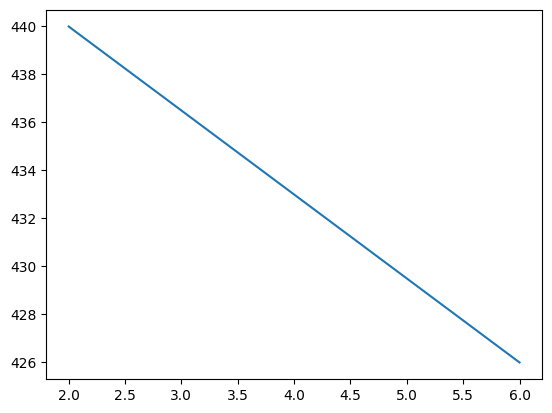

In [20]:
df1=df[df['name']=='Оверсайз лонгслив женский из плотной ткани']

import matplotlib.pyplot as plt
plt.plot(df1['position']);

In [14]:
import plotly.express as px

px.line(df1['position'])

In [15]:
df1=df[df['name']=='Оверсайз лонгслив женский из плотной ткани']

In [21]:
pd.pivot_table(
    df1,
    index='query',
    columns='hour',
    values='promo_position',
    aggfunc='mean'
)

hour,18
query,
лонгслив женский оверсайз,50.0


In [18]:
df['hour']=df['created_at'].dt.hour
df['date']=df['created_at'].dt.date
df

,position,promo_position,created_at,query,name,diff,hour,date
0,620,27,2025-04-07 18:12:38.296895,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,593,18,2025-04-07
1,482,31,2025-04-07 18:12:38.296901,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,451,18,2025-04-07
2,440,43,2025-04-07 18:12:38.296904,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани,397,18,2025-04-07
3,1954,44,2025-04-07 18:12:38.296905,лонгслив женский оверсайз,Набор лонгсливов свободных оверсайз с длинным ...,1910,18,2025-04-07
4,962,48,2025-04-07 18:12:38.296906,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,914,18,2025-04-07
5,792,51,2025-04-07 18:12:38.296907,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,741,18,2025-04-07
6,426,57,2025-04-07 18:12:38.296909,лонгслив женский оверсайз,Оверсайз лонгслив женский из плотной ткани,369,18,2025-04-07
7,492,58,2025-04-07 18:12:38.296910,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,434,18,2025-04-07
8,569,62,2025-04-07 18:12:38.296911,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,507,18,2025-04-07
9,716,82,2025-04-07 18:12:38.296916,лонгслив женский оверсайз,Лонгслив свободный оверсайз с длинным рукавом,634,18,2025-04-07


In [19]:
# res.json()['data']['products'][1]['log']

In [24]:
# res.json()['data']['products'][1]['brand']